#Movielens 데이터분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 파일 저장경로
movies_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'
ratings_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
users_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/users.dat'

In [3]:
# DataFrame을 만들 때 사용할 컬럼 이름들
movies_cols=['movie_id','title','genres']
ratings_cols = ['user_id','movie_id','rating','timestamp']
users_cols=['user_id','gender','age','occupation','zip_code']

In [4]:
movies = pd.read_csv(movies_dat, sep='::', engine='python', names=movies_cols)
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = pd.read_csv(ratings_dat, sep='::', engine='python', names=ratings_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users = pd.read_csv(users_dat, sep='::', engine='python',names=users_cols)
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [10]:
df = pd.merge(ratings,movies, how='inner')
df

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [11]:
df = pd.merge(df,users, how='inner', on = 'user_id')

In [12]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [13]:
df.tail()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662
1000208,4211,3834,2,965318885,Bronco Billy (1980),Adventure|Drama|Romance,M,45,5,77662


# 데이터 분석

* rating 빈도수
* gender 빈도수
* occupation 빈도수

In [14]:
df.rating.value_counts().sort_index()

1     56174
2    107557
3    261197
4    348971
5    226310
Name: rating, dtype: int64

In [15]:
df.gender.value_counts()

M    753769
F    246440
Name: gender, dtype: int64

In [16]:
df.occupation.value_counts().sort_index()

0     130499
1      85351
2      50068
3      31623
4     131032
5      21850
6      37205
7     105425
8       2706
9      11345
10     23290
11     20563
12     57214
13     13754
14     49109
15     22951
16     46021
17     72816
18     12086
19     14904
20     60397
Name: occupation, dtype: int64

### 영화 별점 평균 상위 10개 , 하위 10개

In [17]:
title10 = df.groupby('title')['rating'].mean()
title10

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [18]:
#별점 평균 상위 10개
title10.sort_values(ascending=False).head(10)

title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: rating, dtype: float64

In [19]:
#별점 평균 하위 10개
title10.sort_values(ascending=False).tail(10)
# title10.sort_values().head(10) 위와 같은 코드

title
Spring Fever USA (a.k.a. Lauderdale) (1989)                   1.0
Loves of Carmen, The (1948)                                   1.0
Underworld (1997)                                             1.0
Low Life, The (1994)                                          1.0
Santa with Muscles (1996)                                     1.0
Fantastic Night, The (La Nuit Fantastique) (1949)             1.0
Cheetah (1989)                                                1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Mutters Courage (1995)                                        1.0
Windows (1980)                                                1.0
Name: rating, dtype: float64

In [20]:
#영화별 빈도수,별점 평균
df.groupby('title')['rating'].agg(['count','mean']).sort_values(by='mean',ascending=False)

,count,mean
title,,
Ulysses (Ulisse) (1954),1,5.0
Lured (1947),1,5.0
Follow the Bitch (1998),1,5.0
Bittersweet Motel (2000),1,5.0
Song of Freedom (1936),1,5.0
...,...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1,1.0
Cheetah (1989),1,1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973),2,1.0


리뷰 건수가 1~2개 밖에 없는 영화들의 별점 평균을 계산하는 것은 큰 의미가 없을 것 같다. 일정 숫자 이상의 리뷰 건수가 있는 영화들을 선택해서 별점 분석을 하는 것이 더 의미가 있을 것 같다.

In [21]:
title_counts = df['title'].value_counts()
title_counts

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Waiting Game, The (2000)                                    1
Shadows (Cienie) (1988)                                     1
Juno and Paycock (1930)                                     1
Resurrection Man (1998)                                     1
Windows (1980)                                              1
Name: title, Length: 3706, dtype: int64

In [22]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

리뷰 횟수(제목 등장 횟수)가 150번 이상인 영화들을 선택해서 분석

In [23]:
indexer = title_counts[title_counts>=150].index
indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Alligator (1980)', 'Cowboy Way, The (1994)', 'Twelfth Night (1996)',
       'Program, The (1993)', 'Love and Death on Long Island (1997)',
       'Asphalt Jungle, The (1950)',
       'Tales from the Crypt Presents: Bordello of Blood (1996)',
       'Golden Voyage of Sinbad, The (1974)', 'In the Army Now (1994)',
       'Police Academy 5: Assignment: Miami Beach (1988)'],
      dtype='object', length=1683)

In [24]:
#150번 이상 나오는 영화 제목들 중에서 별점 평균 상위 10개 영화 출력
title10.loc[indexer].sort_values(ascending=False).head(10)

Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

In [25]:
#150번 이상 나오는 영화 제목들 중에서 별점 평균 하위 10개 영화 출력
title10.loc[indexer].sort_values().head(10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64

## 성별에 따른 별점 평균

In [27]:
df.groupby(['title','gender'])['rating'].mean()
#> MultiIndex를 갖는 Series

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: rating, Length: 7152, dtype: float64

In [28]:
df.groupby(['title','gender'])['rating'].mean().unstack()
#> gender 인덱스가 컬럼으로 변환된 데이터프레임

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [32]:
by_gender = df.pivot_table(values='rating', index='title', columns='gender', aggfunc='mean')
#pd.pivot_table 파라미터:
#   values: 통계 함수를 적용할 변수(컬럼).
#   index: 행(row) 인덱스로 사용할 (카테고리 타입) 변수(컬럼).
#   columns: 열(column)이름으로 사용할 (카테고리 타입) 변수(컬럼).
#   aggfunc: 변수(컬럼)에 적용할 통계 함수 이름. 기본값은 'mean'

In [33]:
#150회 이상의 별점을 받은 영화들만 선택
by_gender_150 = by_gender.loc[indexer]
by_gender_150

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
"Asphalt Jungle, The (1950)",3.571429,4.008130
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818
In the Army Now (1994),2.384615,2.192000


In [40]:
#150회 이상 별점을 받은 영화들 중에서 여성들의 별점 평균 상위 10개
by_gender_150.sort_values(by='F', ascending=False).head(10)

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [41]:
#150회 이상 별점을 받은 영화들 중에서 남성들의 별점 평균 상위 10개
by_gender_150.sort_values(by='M', ascending=False).head(10)

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


## 성별 평점 차이가 큰 영화

In [42]:
# 성별 별점 평균이 계산된 데이터 프레임에 diff=여성평균-남성평균 파생변수 추가 생성
by_gender_150['diff']= by_gender_150['F']-by_gender_150['M']
by_gender_150

gender,F,M,diff
American Beauty (1999),4.238901,4.347301,-0.108400
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,-0.192371
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,-0.238096
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,-0.203821
Jurassic Park (1993),3.579407,3.814197,-0.234791
...,...,...,...
"Asphalt Jungle, The (1950)",3.571429,4.008130,-0.436702
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891,0.161381
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818,-0.273923
In the Army Now (1994),2.384615,2.192000,0.192615


In [45]:
#성별 별점 평균의 차이가 큰 영화 상위 10개 - 여성 평균이 더 높아 내림차순
by_gender_150.sort_values(by='diff',ascending=False).head(10)

gender,F,M,diff
Dirty Dancing (1987),3.790378,2.959596,0.830782
Home Alone 3 (1997),2.486486,1.683761,0.802726
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,0.642857
Grease (1978),3.975265,3.367041,0.608224
Police Academy 4: Citizens on Patrol (1987),2.406250,1.802817,0.603433
Brokedown Palace (1999),3.312500,2.723577,0.588923
"Relic, The (1997)",3.309524,2.723077,0.586447
Angels in the Outfield (1994),3.162500,2.580838,0.581662


In [46]:
#성별 별점 평균의 차이가 큰 영화 상위 10개 - 남성 평균이 더 높아 오름차순
by_gender_150.sort_values(by='diff').head(10)

gender,F,M,diff
Lifeforce (1985),2.250000,2.994152,-0.744152
Quest for Fire (1981),2.578947,3.309677,-0.730730
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
No Escape (1994),2.300000,2.994048,-0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Tora! Tora! Tora! (1970),3.090909,3.737705,-0.646796
Up in Smoke (1978),2.944444,3.585227,-0.640783
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
Friday the 13th: The Final Chapter (1984),1.636364,2.258503,-0.622140
"Longest Day, The (1962)",3.411765,4.031447,-0.619682


In [49]:
df[df['title']=='Lifeforce (1985)']

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
595,17,2377,5,978160993,Lifeforce (1985),Horror|Sci-Fi,M,50,1,95350
3421,53,2377,5,977976632,Lifeforce (1985),Horror|Sci-Fi,M,25,0,96931
11197,195,2377,4,977551016,Lifeforce (1985),Horror|Sci-Fi,M,25,12,10458
15504,245,2377,2,976732787,Lifeforce (1985),Horror|Sci-Fi,M,35,16,66046
28870,424,2377,3,1017693559,Lifeforce (1985),Horror|Sci-Fi,M,25,17,55112
...,...,...,...,...,...,...,...,...,...,...
984555,4520,2377,3,990901672,Lifeforce (1985),Horror|Sci-Fi,M,25,4,45810
986917,94,2377,5,977628669,Lifeforce (1985),Horror|Sci-Fi,M,25,17,28601
987219,1357,2377,2,974770934,Lifeforce (1985),Horror|Sci-Fi,M,45,0,34116
998126,860,2377,5,975342896,Lifeforce (1985),Horror|Sci-Fi,M,18,0,78237


## 여성들의 별점 평균 상위 100위까지 영화들의 장르 순서

In [51]:
df.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'genres',
       'gender', 'age', 'occupation', 'zip_code'],
      dtype='object')

In [ ]:
# 여성 별점 평균 상위 100개 영화 제목 인덱스
female_top100 =by_gender_150.sort_values(by='F',ascending=False).head(100).index
female_top100

In [72]:
#movies 데이터 프레임에서 title컬럼을 행(row)인덱스로 변환
movies_with_index = movies.set_index('title')
movies_with_index.head()

,movie_id,genres
title,,
Toy Story (1995),1,Animation|Children's|Comedy
Jumanji (1995),2,Adventure|Children's|Fantasy
Grumpier Old Men (1995),3,Comedy|Romance
Waiting to Exhale (1995),4,Comedy|Drama
Father of the Bride Part II (1995),5,Comedy


In [80]:
# movies 데이터 프레임에서 여성 별점 평균 상위 100위 까지의 영화 제목
female_movies = movies_with_index.loc[female_top100]
female_movies.head()

,movie_id,genres
"Close Shave, A (1995)",745,Animation|Comedy|Thriller
"Wrong Trousers, The (1993)",1148,Animation|Comedy
"General, The (1927)",3022,Comedy
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),922,Film-Noir
Wallace & Gromit: The Best of Aardman Animation (1996),720,Animation


In [92]:
# 여성 별점 평균 상위 100개 영화의 장르 분석
female_genres = []
for x in female_movies['genres'].str.split('|'):
    female_genres.extend(x)

female_genres = pd.Series(female_genres)
female_10 = female_genres.value_counts().head(10)
female_10

Drama        45
Comedy       28
Thriller     23
Romance      20
Mystery      13
War          12
Film-Noir    11
Action        9
Crime         8
Adventure     6
dtype: int64

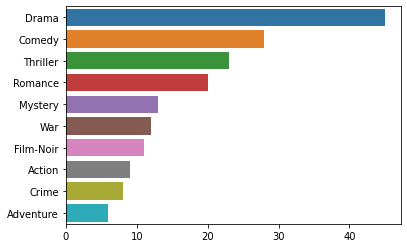

In [95]:
sns.barplot(x=female_10.values, y=female_10.index)
plt.show()

## 남성들의 별점 평균 상위 100위까지 영화들의 장르 순서.

In [96]:
# 남성 별점 평균 상위 100위까지의 영화 제목
male_top100 = by_gender_150.sort_values(by='M', ascending=False).head(100).index
male_top100

Index(['Godfather, The (1972)',
       'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
       'Shawshank Redemption, The (1994)', 'Raiders of the Lost Ark (1981)',
       'Usual Suspects, The (1995)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Schindler's List (1993)',
       'Paths of Glory (1957)', 'Wrong Trousers, The (1993)',
       'Close Shave, A (1995)', 'Rear Window (1954)',
       'Double Indemnity (1944)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
       'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)', 'Casablanca (1942)',
       'Third Man, The (1949)', 'Lawrence of Arabia (1962)',
       'Godfather: Part II, The (1974)',
       'One Flew Over the Cuckoo's Nest (1975)', 'Maltese Falcon, The (1941)',
       'Great Escape, The (1963)', 'Citizen Kane (1941)', 'Yojimbo (1961)',
       'Bridge on the River Kwai, The (1957)', 'Saving Private Ryan (1998)',
       'North by Northwest (1959)',
       'Wallac

In [97]:
# movies 데이터 프레임에서 남성 별점 평균 상위 100위까지의 영화 정보
male_movies = movies_with_index.loc[male_top100]
male_movies.head()

,movie_id,genres
"Godfather, The (1972)",858,Action|Crime|Drama
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),2019,Action|Drama
"Shawshank Redemption, The (1994)",318,Drama
Raiders of the Lost Ark (1981),1198,Action|Adventure
"Usual Suspects, The (1995)",50,Crime|Thriller


In [98]:
male_genres = []
for x in male_movies['genres'].str.split('|'):
    male_genres.extend(x)

male_genres = pd.Series(male_genres)
male_genres

0          Action
1           Crime
2           Drama
3          Action
4           Drama
          ...    
193    Children's
194        Comedy
195        Action
196       Western
197         Drama
Length: 198, dtype: object

In [99]:
male_genres.value_counts()

Drama          51
Comedy         23
War            20
Thriller       19
Action         14
Crime          13
Film-Noir      13
Mystery         9
Adventure       8
Romance         7
Animation       6
Sci-Fi          5
Western         4
Horror          2
Fantasy         1
Documentary     1
Musical         1
Children's      1
dtype: int64

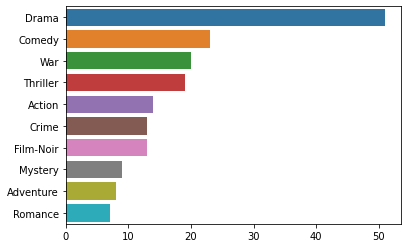

In [100]:
male_genres_10 = male_genres.value_counts().head(10)
sns.barplot(x=male_genres_10.values, y=male_genres_10.index)
plt.show()

## 선호도의 차이가 큰 영화

150회 이상의 리뷰가 있는 영화들 중에서 별점의 표준편차가 큰 순위 상위 10개 제목

In [ ]:
# 영화 제목별 별점의 표준 편차
std_movie = df.groupby('title')['rating'].std()
std_movie

In [ ]:
#150회 이상의 리뷰가 있는 영화들만 선택
std_movie_150 = std_movie.loc[indexer]
std_movie_150

In [ ]:
# 150번 이상 리뷰가 있는 영화들 중에서 별점 표준편차가 큰 상위 10개
std_movie_150.sort_values(ascending=False).head(10) # sort_values에서 by를 쓰면 데이터프레임이 적용됨

150회 이상의 리뷰가 있는 영화들 중에서 별점의 표준편차가 큰 순위 상위 10개 영화 장르들

In [ ]:
std_50 = std_movie_150.sort_values(ascending=False).head(50).index
std_50

In [145]:
movies_std_50 = movies_with_index.loc[std_50]

In [ ]:
movies_std_50.head()

In [ ]:
genres = []
for x in movies_std_50['genres'].str.split('|'):
    genres.extend(x)

genres = pd.Series(genres)
genres.value_counts().head(10)

## 별점 평균이 4.0 이상인 영화들에서 자주 등장하는 영화 장르 상위 10개

In [158]:
#영화 제목별 별점의 평균
mean_movie = df.groupby('title')['rating'].mean()
mean_movie

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [171]:
# 리뷰 150개 이상인 영화들의 별점 평균
mean_150 = mean_movie.loc[indexer]
mean_150

American Beauty (1999)                                     4.317386
Star Wars: Episode IV - A New Hope (1977)                  4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)      4.292977
Star Wars: Episode VI - Return of the Jedi (1983)          4.022893
Jurassic Park (1993)                                       3.763847
                                                             ...   
Asphalt Jungle, The (1950)                                 3.927152
Tales from the Crypt Presents: Bordello of Blood (1996)    2.589404
Golden Voyage of Sinbad, The (1974)                        3.397351
In the Army Now (1994)                                     2.225166
Police Academy 5: Assignment: Miami Beach (1988)           1.766667
Name: rating, Length: 1683, dtype: float64

In [190]:
# 리뷰 150회 이상, 별점 평균 4.0 이상인 영화들
mean_4 = mean_150[mean_150.values >= 4.0]
mean_4

American Beauty (1999)                                         4.317386
Star Wars: Episode IV - A New Hope (1977)                      4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)          4.292977
Star Wars: Episode VI - Return of the Jedi (1983)              4.022893
Saving Private Ryan (1998)                                     4.337354
                                                                 ...   
Grand Illusion (Grande illusion, La) (1937)                    4.339394
Seven Days in May (1964)                                       4.254545
Sullivan's Travels (1942)                                      4.093168
Paradise Lost: The Child Murders at Robin Hood Hills (1996)    4.213836
Pawnbroker, The (1965)                                         4.198718
Name: rating, Length: 283, dtype: float64

In [200]:
# 리뷰 150회 이상, 별점 평균 4.0 이상인 영화 제목들의 상위 10개
mean_4.sort_values(ascending=False).head(10)

Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

In [202]:
# 리뷰 150회 이상, 별점 평균 4.0 이상인 영화 제목들의 상위 10개의 제목들
mean_index = mean_4.sort_values(ascending=False).index
mean_index

Index(['Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
       'Shawshank Redemption, The (1994)', 'Godfather, The (1972)',
       'Close Shave, A (1995)', 'Usual Suspects, The (1995)',
       'Schindler's List (1993)', 'Wrong Trousers, The (1993)',
       'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
       'Raiders of the Lost Ark (1981)', 'Rear Window (1954)',
       ...
       'Midnight Express (1978)', 'Everest (1998)',
       'Dead Poets Society (1989)', 'Miller's Crossing (1990)',
       'Nikita (La Femme Nikita) (1990)', 'Dirty Dozen, The (1967)',
       'Delicatessen (1991)', 'Much Ado About Nothing (1993)',
       'Run Silent, Run Deep (1958)', 'Local Hero (1983)'],
      dtype='object', length=283)

In [204]:
# 리뷰 150회 이상, 별점 평균 4.0 이상인 영화 제목들의 상위 10개의 데이터프레임(아이디,장르)
mean_genres = movies_with_index.loc[mean_index]
mean_genres

,movie_id,genres
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),2019,Action|Drama
"Shawshank Redemption, The (1994)",318,Drama
"Godfather, The (1972)",858,Action|Crime|Drama
"Close Shave, A (1995)",745,Animation|Comedy|Thriller
"Usual Suspects, The (1995)",50,Crime|Thriller
...,...,...
"Dirty Dozen, The (1967)",2944,Action|War
Delicatessen (1991),1175,Comedy|Sci-Fi
Much Ado About Nothing (1993),497,Comedy|Romance
"Run Silent, Run Deep (1958)",2670,War


In [184]:
genre = []
for x in mean_genres['genres'].str.split('|'):
    genre.extend(x)

genre = pd.Series(genre)
genre.value_counts().head(10)

Drama        134
Comedy        82
Thriller      51
Romance       38
Action        36
War           36
Crime         26
Mystery       21
Sci-Fi        19
Adventure     17
dtype: int64

## 성별 별점 평균이 4.0 이상인 영화들에서 자주 등장하는 영화 장르 상위 10개

In [192]:
by_gender_150 = by_gender_150.drop(['diff'],axis=1)

In [224]:
# 리뷰 150회 이상인 영화들의 여성 별점 평균 4.0 이상인 영화 제목들
gender_female = by_gender_150[by_gender_150['F'] >= 4.0].index
gender_female

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Saving Private Ryan (1998)', 'Matrix, The (1999)',
       'Silence of the Lambs, The (1991)', 'Raiders of the Lost Ark (1981)',
       'Fargo (1996)', 'Sixth Sense, The (1999)', 'Braveheart (1995)',
       ...
       'Once Were Warriors (1994)', 'Suspicion (1941)', 'Everest (1998)',
       'Grand Illusion (Grande illusion, La) (1937)',
       'Seven Days in May (1964)', 'Sullivan's Travels (1942)',
       'Paradise Lost: The Child Murders at Robin Hood Hills (1996)',
       'Pawnbroker, The (1965)', 'Dead Man (1995)', 'Twelfth Night (1996)'],
      dtype='object', length=279)

In [232]:
movies_female_over4 = movies_with_index.loc[gender_female]

In [229]:
female_genres=[]
for x in movies_female_over4['genres'].str.split('|'):
    female_genres.extend(x)
female_genres= pd.Series(female_genres)
female_genres.value_counts().head(10)

Drama        145
Comedy        82
Romance       47
Thriller      40
War           32
Action        24
Mystery       22
Crime         21
Musical       17
Adventure     15
dtype: int64

In [225]:
# 리뷰 150회 이상인 영화들의 남성 별점 평균 4.0 이상인 영화 제목들
gender_male = by_gender_150[by_gender_150['M'] >= 4.0].index
gender_male

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Saving Private Ryan (1998)', 'Terminator 2: Judgment Day (1991)',
       'Matrix, The (1999)', 'Back to the Future (1985)',
       'Silence of the Lambs, The (1991)', 'Raiders of the Lost Ark (1981)',
       ...
       'Matewan (1987)', 'Shall We Dance? (1937)',
       'Once Upon a Time in the West (1969)', 'Everest (1998)',
       'Grand Illusion (Grande illusion, La) (1937)',
       'Seven Days in May (1964)', 'Sullivan's Travels (1942)',
       'Paradise Lost: The Child Murders at Robin Hood Hills (1996)',
       'Pawnbroker, The (1965)', 'Asphalt Jungle, The (1950)'],
      dtype='object', length=278)

In [231]:
movies_male_over4 = movies_with_index.loc[gender_male]

In [234]:
male_genres=[]
for x in movies_male_over4['genres'].str.split('|'):
    male_genres.extend(x)
male_genres= pd.Series(male_genres)
male_genres.value_counts().head(10)

Drama        131
Comedy        80
Thriller      49
Action        39
War           36
Romance       32
Crime         26
Sci-Fi        19
Mystery       19
Adventure     17
dtype: int64